In [1]:
import re, time, warnings, os, sys, copy
import gzip, pickle

import numpy as np
import pandas as pd
import gzip, pickle
import scipy, sklearn, mne

import auxiliary as aux
import data, rsa
sys.path.append('../spaces/')
import embeddings as emb
import pubplot as pub
import matplotlib.pyplot as plt

pub.styles.set()
C = pub.colours.equidistant('tab20c', k = 20)

## Supplementary Table 8
This notebook produces supplementary results for the analysis of prior switching.

In [2]:
# load inc-inv
with gzip.open(f'./data/results/rerp-mt2-c0-i1-k5-z0-s0-b0-inv.pkl.gz', 'rb') as f:
    r_inc_inv, os_inc_inv, ct_inc_inv = pickle.load(f)

# load inc-spc
with gzip.open(f'./data/results/rerp-mt2-c0-i1-k5-z0-s0-b0-spc.pkl.gz', 'rb') as f:
    r_inc_spc, os_inc_spc, ct_inc_spc = pickle.load(f)

# load con-inv
with gzip.open(f'./data/results/rerp-mt2-c1-i0-k5-z0-s0-b0-inv.pkl.gz', 'rb') as f:
    r_con_inv, os_con_inv, ct_con_inv = pickle.load(f)

# load con-spc
with gzip.open(f'./data/results/rerp-mt2-c1-i0-k5-z0-s0-b0-spc.pkl.gz', 'rb') as f:
    r_con_spc, os_con_spc, ct_con_spc = pickle.load(f)

In [3]:
'''
Generate table 8
'''

contrast = []
mu = []
sd = []
df = []
t = []
p = []

for key in ct_inc_inv:
    i, j = key.split(' ')[1].split('-')
    i, j = int(i), int(j)
    
    ii = ['baseline', 'ac.', 'sem.', 'bth.']
    i = ii[i]
    j = ii[j]
    
    name = f'inc. inv. {i}-{j}'
    con = ct_inc_inv[key]
    
    contrast.append(name)
    mu.append(con['mu'])
    sd.append(con['sd'])
    df.append(con['df'])
    t.append(con['t'])
    p.append(con['p_cor'])

for key in ct_inc_spc:
    i, j = key.split(' ')[1].split('-')
    i, j = int(i), int(j)
    
    ii = ['baseline', 'ac.', 'sem.', 'bth.']
    i = ii[i]
    j = ii[j]
    
    name = f'inc. spc. {i}-{j}'
    con = ct_inc_spc[key]
    
    contrast.append(name)
    mu.append(con['mu'])
    sd.append(con['sd'])
    df.append(con['df'])
    t.append(con['t'])
    p.append(con['p_cor'])

for key in ct_con_inv:
    i, j = key.split(' ')[1].split('-')
    i, j = int(i), int(j)
    
    ii = ['baseline', 'ac.', 'sem.', 'bth.']
    i = ii[i]
    j = ii[j]
    
    name = f'con. inv. {i}-{j}'
    con = ct_con_inv[key]
    
    contrast.append(name)
    mu.append(con['mu'])
    sd.append(con['sd'])
    df.append(con['df'])
    t.append(con['t'])
    p.append(con['p_cor'])

for key in ct_con_spc:
    i, j = key.split(' ')[1].split('-')
    i, j = int(i), int(j)
    
    ii = ['baseline', 'ac.', 'sem.', 'bth.']
    i = ii[i]
    j = ii[j]
    
    name = f'con. spc. {i}-{j}'
    con = ct_con_spc[key]
    
    contrast.append(name)
    mu.append(con['mu'])
    sd.append(con['sd'])
    df.append(con['df'])
    t.append(con['t'])
    p.append(con['p_cor'])
    
df = {'contrast': contrast, 'M': mu, 'Std. Dev.': sd, 'df': df, 't-value': t, 'p-value': p}
df = pd.DataFrame.from_dict(df)

print(df.to_latex(index = False))

\begin{tabular}{lrrrrr}
\toprule
               contrast &         M &  Std. Dev. &  df &   t-value &      p-value \\
\midrule
 inc. inv. ac.-baseline & -0.000315 &   0.001721 &  34 & -1.065444 & 5.883657e-01 \\
inc. inv. sem.-baseline &  0.001820 &   0.003506 &  34 &  3.026296 & 1.877703e-02 \\
     inc. inv. sem.-ac. &  0.002134 &   0.003596 &  34 &  3.460802 & 8.825596e-03 \\
inc. inv. bth.-baseline &  0.001554 &   0.003933 &  34 &  2.304360 & 8.231825e-02 \\
     inc. inv. bth.-ac. &  0.001869 &   0.003298 &  34 &  3.304056 & 1.125702e-02 \\
    inc. inv. bth.-sem. & -0.000265 &   0.001571 &  34 & -0.984436 & 3.318550e-01 \\
 inc. spc. ac.-baseline & -0.001189 &   0.000724 &  34 & -9.580910 & 2.070851e-10 \\
inc. spc. sem.-baseline & -0.001074 &   0.002560 &  34 & -2.446197 & 5.929342e-02 \\
     inc. spc. sem.-ac. &  0.000116 &   0.002711 &  34 &  0.248509 & 8.052359e-01 \\
inc. spc. bth.-baseline & -0.002037 &   0.002557 &  34 & -4.646061 & 1.967241e-04 \\
     inc. spc. bth.-ac.

/var/folders/b4/qysvl6jd4995kp_qql3yj3880000gn/T/ipykernel_40368/302022905.py:87: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index = False))


## Supplemental Figure 8
This produces latency estimates for figure 8.

In [4]:
# load coefs inc-inv
with gzip.open(f'./data/results/rerp-mt2-ko-m2-c0-i1-k5-z0-s0-b0-inv.pkl.gz', 'rb') as f:
    R2_inc_inv, cb_inc_inv = pickle.load(f)
    
# load coefs con-spc
with gzip.open(f'./data/results/rerp-mt2-ko-m2-c1-i0-k5-z0-s0-b0-spc.pkl.gz', 'rb') as f:
    R2_con_spc, cb_con_spc = pickle.load(f)

# load coefficients for spc
with gzip.open(f'./data/results/rerp-mt1-ko-n2-call-k5-z0-s0-b0-spc-llm5.pkl.gz', 'rb') as f:
    R2, clusters = pickle.load(f)

import matplotlib
C1 = pub.colours.equidistant('YlOrRd', k = 20)
cols_inv = [C1[5], C1[12], C1[10]]
cols_spc = [C1[7], C1[13], C1[11]]
cols_bot = [C1[9], C1[14], C1[12]]

0.25219047619047624 0.12615546684174636
0.2444285714285714 0.1162556998822081
0.25942857142857145 0.1501702435265267
0.2527142857142858 0.10754628808858377
TtestResult(statistic=-0.5550950390071945, pvalue=0.5824635983485479, df=34)
TtestResult(statistic=-0.2848818635672635, pvalue=0.7774627768570407, df=34)
TtestResult(statistic=0.21964507156171323, pvalue=0.8274609828706448, df=34)


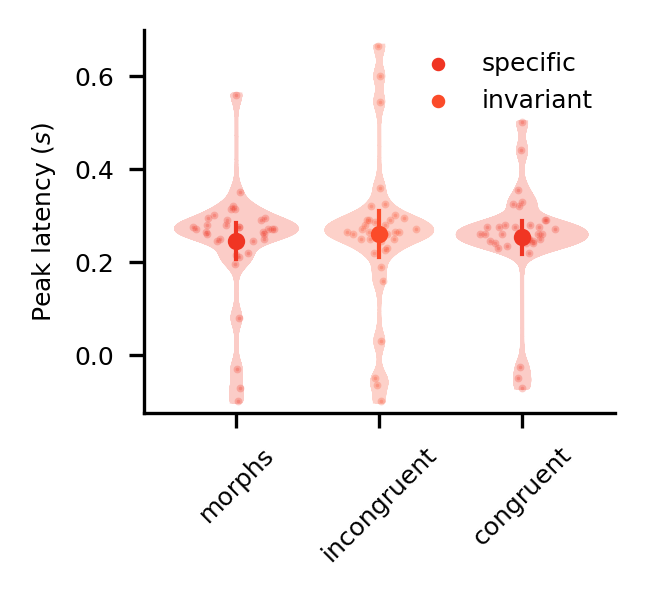

In [5]:
r0 = R2[:,clusters['ß_17'][0]['chs_i'],17,:].mean(axis = 1)
r1 = R2_inc_inv[:,cb_inc_inv['ß_9'][0]['chs_i'],9,:].mean(axis = 1)
r2 = R2_con_spc[:,cb_con_spc['ß_11'][0]['chs_i'],11,:].mean(axis = 1)

D0 = r0.argmax(axis = 1)*5e-3-0.1
D1 = r1.argmax(axis = 1)*5e-3-0.1
D2 = r2.argmax(axis = 1)*5e-3-0.1

bw = np.array([D0, D1, D2]).flatten()
bw = pub.dist._bandwidth_botev(bw)

fig, ax = pub.figure()
pub.dist.violins(np.array([D0, D1, D2]), jitter = True, jitter_max = 1.75 * bw, kernel_bandwidth = bw, scatter_dep = False, colours = [cols_spc[1], cols_inv[1], cols_spc[1]], ax = ax)
ax.scatter([-1], [-1], color = cols_spc[1], marker = 'o', s = 5, label = r'specific')
ax.scatter([-1], [-1], color = cols_inv[1], marker = 'o', s = 5, label = r'invariant')
ax.set_ylabel(r'Peak latency ($s$)')
ax.set_ylim([-0.125, 0.7])
ax.set_xlim([-0.65, 2.65])
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['morphs', 'incongruent', 'congruent'], rotation = 45)
pub.cosmetics.legend(ax = ax)
pub.cosmetics.finish()

DW = np.concatenate((D0, D1, D2))
print(DW.mean(), DW.std())

print(D0.mean(), D0.std())
print(D1.mean(), D1.std())
print(D2.mean(), D2.std())

print(scipy.stats.ttest_rel(D0, D1))
print(scipy.stats.ttest_rel(D0, D2))
print(scipy.stats.ttest_rel(D1, D2))

fig.savefig(f'./figures/png/suppfig8_latencies.png', dpi = 300)
fig.savefig(f'./figures/svg/suppfig8_latencies.svg')
fig.savefig(f'./figures/pdf/suppfig8_latencies.pdf')